In [42]:
import numpy as np
import pandas as pd
import statistics as stat

import seaborn as sns
import matplotlib.pyplot as plt

from collections import Counter
from operator import itemgetter

%matplotlib inline

# Validation Curve

In [93]:
path_to_figure = ''

param_range = np.arange(1, 51, 1)

valid_avg_test = np.load('./../../data_source/results/original_images/validation_curve/original_images_avg_validation_curve_test.npy')
valid_avg_train = np.load('./../../data_source/results/original_images/validation_curve/original_images_avg_validation_curve_train.npy')
valid_std_test = np.load('./../../data_source/results/original_images/validation_curve/original_images_std_validation_curve_test.npy')
valid_std_train = np.load('./../../data_source/results/original_images/validation_curve/original_images_std_validation_curve_train.npy')

#valid_avg_test = np.load('./../../data_source/results/removed_broken_slices/validation_curve/avg_validation_curve_test.npy')
#valid_avg_train = np.load('./../../data_source/results/removed_broken_slices/validation_curve/avg_validation_curve_train.npy')
#valid_std_test = np.load('./../../data_source/results/removed_broken_slices/validation_curve/std_validation_curve_test.npy')
#valid_std_train = np.load('./../../data_source/results/removed_broken_slices/validation_curve/std_validation_curve_train.npy')

In [94]:
valid_avg_test.shape, valid_avg_train.shape

((40, 50), (40, 50))

In [95]:
valid_avg_test = np.mean(valid_avg_test, axis=0)
valid_avg_train = np.mean(valid_avg_train, axis=0)
valid_std_test = np.mean(valid_std_test, axis=0)
valid_std_train = np.mean(valid_std_train, axis=0)

In [96]:
valid_avg_test.shape, valid_avg_train.shape

((50,), (50,))

In [97]:
valid_avg_test, valid_avg_train

(array([0.66465201, 0.66144689, 0.66593407, 0.66593407, 0.66593407,
        0.66593407, 0.66593407, 0.66593407, 0.66593407, 0.66593407,
        0.66593407, 0.66593407, 0.66593407, 0.66593407, 0.66593407,
        0.66593407, 0.66593407, 0.66593407, 0.66593407, 0.66593407,
        0.66593407, 0.66593407, 0.66593407, 0.66593407, 0.66593407,
        0.66593407, 0.66593407, 0.66593407, 0.66593407, 0.66593407,
        0.66593407, 0.66593407, 0.66593407, 0.66593407, 0.66593407,
        0.66593407, 0.66593407, 0.66593407, 0.66593407, 0.66593407,
        0.66593407, 0.66593407, 0.66593407, 0.66593407, 0.66593407,
        0.66593407, 0.66593407, 0.66593407, 0.66593407, 0.66593407]),
 array([0.68399615, 0.6874088 , 0.69367127, 0.69367127, 0.69367127,
        0.69367127, 0.69367127, 0.69367127, 0.69367127, 0.69367127,
        0.69367127, 0.69367127, 0.69367127, 0.69367127, 0.69367127,
        0.69367127, 0.69367127, 0.69367127, 0.69367127, 0.69367127,
        0.69367127, 0.69367127, 0.69367127, 0.

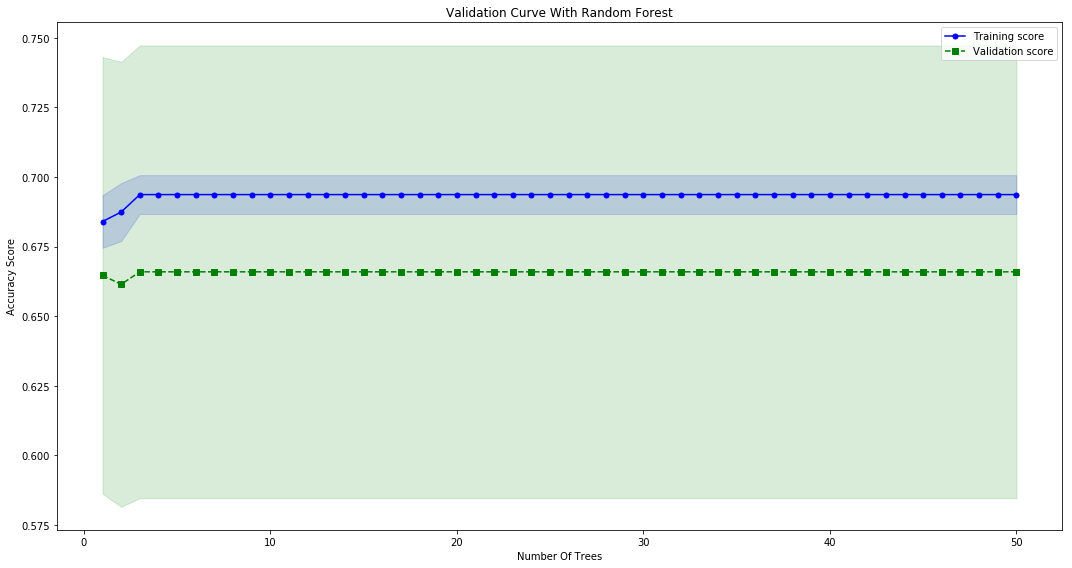

In [98]:
plt.figure(figsize=(15, 8))

plt.plot(
    param_range, valid_avg_train, color='blue', marker='o', markersize=5,
    label=f"Training score"
)
plt.plot(
    param_range, valid_avg_test, color='green', linestyle='--', marker='s', 
    label=f"Validation score"
)
# Plot accurancy bands for training and test sets
plt.fill_between(
    param_range, valid_avg_train - valid_std_train, valid_avg_train + valid_std_train, 
    alpha=0.15, color='blue'
)
plt.fill_between(
    param_range, valid_avg_test - valid_std_test, valid_avg_test + valid_std_test, 
    alpha=0.15, color='green'
)

# Create plot
plt.title("Validation Curve With Random Forest")
plt.xlabel("Number Of Trees")
plt.ylabel("Accuracy Score")
plt.tight_layout()
plt.legend(loc="best")

In [99]:
param_range[np.where(valid_avg_test == np.max(valid_avg_test))]

array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19,
       20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36,
       37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50])

# Learning Curve

In [100]:
path_to_figure = ''

train_sizes = np.linspace(0.1, 1.0, 40)

learn_avg_test = np.load('./../../data_source/results/original_images/learning_curve/original_images_avg_learning_curve_test.npy')
learn_avg_train = np.load('./../../data_source/results/original_images/learning_curve/original_images_avg_learning_curve_train.npy')
learn_std_test = np.load('./../../data_source/results/original_images/learning_curve/original_images_std_learning_curve_test.npy')
learn_std_train = np.load('./../../data_source/results/original_images/learning_curve/original_images_std_learning_curve_train.npy')

#learn_avg_test = np.load('./../../data_source/results/removed_broken_slices/learning_curve/avg_learning_curve_test.npy')
#learn_avg_train = np.load('./../../data_source/results/removed_broken_slices/learning_curve/avg_learning_curve_train.npy')
#learn_std_test = np.load('./../../data_source/results/removed_broken_slices/learning_curve/std_learning_curve_test.npy')
#learn_std_train = np.load('./../../data_source/results/removed_broken_slices/learning_curve/std_learning_curve_train.npy')

In [101]:
learn_avg_test.shape, learn_avg_train.shape

((40, 40), (40, 40))

In [102]:
learn_avg_test = np.mean(learn_avg_test, axis=0)
learn_avg_train = np.mean(learn_avg_train, axis=0)
learn_std_test = np.mean(learn_std_test, axis=0)
learn_std_train = np.mean(learn_std_train, axis=0)

In [103]:
learn_avg_test.shape, learn_avg_train.shape

((40,), (40,))

In [104]:
learn_avg_test, learn_avg_train

(array([0.50658883, 0.55134386, 0.57335165, 0.603663  , 0.5503663 ,
        0.58072344, 0.59108516, 0.53315018, 0.56865842, 0.56151557,
        0.58360806, 0.59917582, 0.60631868, 0.57701465, 0.54468864,
        0.57558379, 0.53040293, 0.51076007, 0.50540293, 0.54725275,
        0.55082418, 0.53063187, 0.54771062, 0.57365614, 0.56785714,
        0.59679487, 0.64569597, 0.64813874, 0.67417582, 0.66776557,
        0.66007326, 0.6760989 , 0.63448489, 0.66236264, 0.64825549,
        0.63021978, 0.64995192, 0.65164835, 0.66593407, 0.66593407]),
 array([0.92928571, 0.84292717, 0.8952924 , 0.86805477, 0.83915344,
        0.80877121, 0.81275834, 0.80320471, 0.77068713, 0.7828166 ,
        0.76183712, 0.75690466, 0.74675904, 0.74120398, 0.71538485,
        0.73806834, 0.75405643, 0.73944244, 0.73070268, 0.70289322,
        0.69892079, 0.69650815, 0.69420459, 0.69469513, 0.69925628,
        0.68579022, 0.67967748, 0.68667407, 0.67921659, 0.6783054 ,
        0.68715158, 0.68635294, 0.68615718, 0.

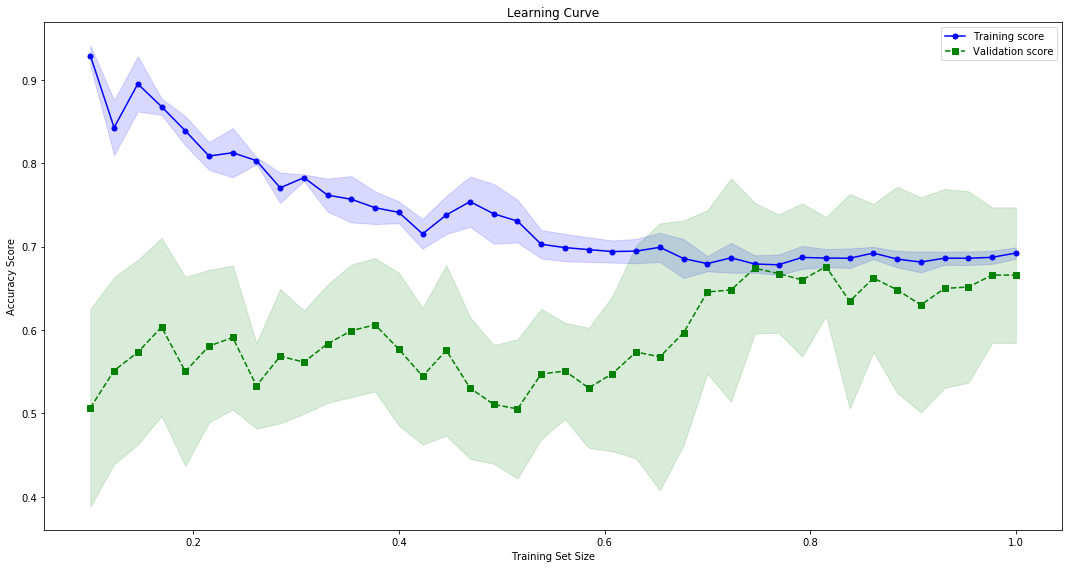

In [105]:
plt.figure(figsize=(15, 8))

plt.plot(
    train_sizes, learn_avg_train, color='blue', marker='o', markersize=5,
    label=f"Training score"
)
plt.plot(
    train_sizes, learn_avg_test, color='green', linestyle='--', marker='s', 
    label=f"Validation score"
)

# Draw bands
plt.fill_between(
    train_sizes, learn_avg_train - learn_std_train, learn_avg_train + learn_std_train, 
    alpha=0.15, color='blue'
)
plt.fill_between(
    train_sizes, learn_avg_test - learn_std_test, learn_avg_test + learn_std_test, 
    alpha=0.15, color='green'
)
# Create plot
plt.title("Learning Curve")
plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
plt.tight_layout()

In [106]:
train_sizes[np.where(learn_avg_test == np.max(learn_avg_test))]

array([0.81538462])